## About a conjecture

In [1]:
%run net_sym.py
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
from scipy.integrate import solve_ivp
import pylab
import matplotlib2tikz as mplt2tikz

In [2]:
g = nx.DiGraph()

### Create an in-tree

In [3]:
g.add_edges_from(([1,0],[2,0]))

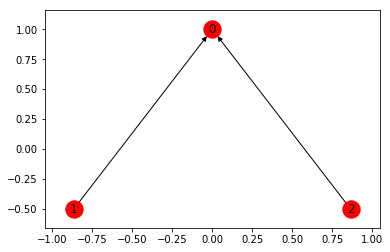

In [4]:
N = nx.number_of_nodes(g)
A = nx.adjacency_matrix(g)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(g), axis=1)).reshape(-1))
layout_dict = nx.spectral_layout(g)
nx.draw_networkx(g, pos=layout_dict)

In [5]:
layout_dict

{1: array([-0.866, -0.5  ]),
 0: array([1.3862e-16, 1.0000e+00]),
 2: array([ 0.866, -0.5  ])}

Define a subcritical pitchfork interaction function

In [6]:
u = -0.2
s_psub = lambda x,u: (1+u)*np.tan(x)
s_psub_inv = lambda x,u: np.arctan(x/(1+u))

In [7]:
dt = 0.01
u_range = np.arange(-1+dt, 1, dt)
n_iter = 1000
N = nx.number_of_nodes(g)
x_us_p = np.zeros((np.size(u_range), N))
x_us_n = np.zeros((np.size(u_range), N))
init = np.random.rand(N)/10

for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psub_inv(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,100], y0=init)
    x_us_p[i] = res.y[:,-1]

for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psub_inv(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,100], y0=-init)
    x_us_n[i] = res.y[:,-1]

In [8]:
u_range_stable = np.arange(-1+dt, -dt, dt)
x_s = np.zeros((np.size(u_range_stable), N))
for i in np.arange(0,np.size(u_range_stable)):
    u = u_range_stable[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psub(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,30], y0=init)
    x_s[i] = res.y[:,-1]

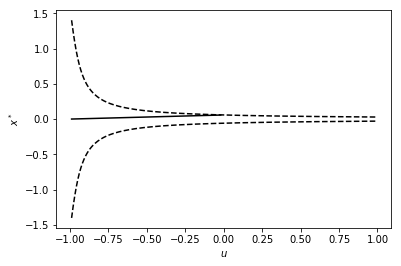

In [9]:
plt.plot(u_range, x_us_p[:,0], color="black", linestyle='--')
plt.plot(u_range, x_us_n[:,0], label="unstable", color="black", linestyle='--')
plt.plot(u_range_stable, x_s[:,0], label="stable", linestyle='-', color="black")
plt.xlabel(r'$u$')
plt.ylabel(r'$x^*$')
mplt2tikz.save("conjecture_in_tree_pitch_sub.tex")

### Add an edge to make the graph lie in the conjectured set

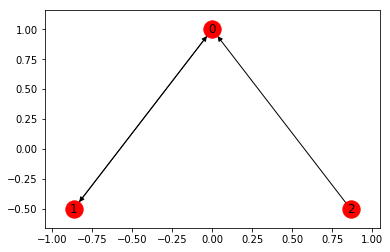

In [10]:
g.add_edge(0,1)
nx.draw_networkx(g, pos=layout_dict)

In [11]:
A = nx.adjacency_matrix(g)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(g), axis=1)).reshape(-1))

In [12]:
np.linalg.eig(D-A)

(array([1., 2., 0.]), matrix([[ 0.    , -0.5774,  0.5774],
         [ 0.    ,  0.5774,  0.5774],
         [ 1.    , -0.5774,  0.5774]]))

In [13]:
x_us_p = np.zeros((np.size(u_range), N))
x_us_n = np.zeros((np.size(u_range), N))
init = np.random.rand(N)/10

for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psub_inv(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,100], y0=init)
    x_us_p[i] = res.y[:,-1]

for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psub_inv(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,100], y0=-init)
    x_us_n[i] = res.y[:,-1]

In [14]:
x_s = np.zeros((np.size(u_range_stable), N))
for i in np.arange(0,np.size(u_range_stable)):
    u = u_range_stable[i]
    f_p = lambda t,x: -D.dot(x) + A.dot(s_psub(x,u))
    res = solve_ivp(fun=f_p, t_span=[0,30], y0=init)
    x_s[i] = res.y[:,-1]

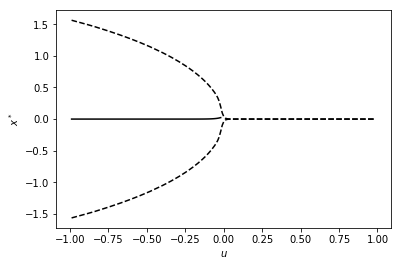

In [15]:
plt.plot(u_range, x_us_p[:,0], color="black", linestyle='--')
plt.plot(u_range, x_us_n[:,0], label="unstable", color="black", linestyle='--')
plt.plot(u_range_stable, x_s[:,0], label="stable", linestyle='-', color="black")
plt.xlabel(r'$u$')
plt.ylabel(r'$x^*$')
mplt2tikz.save("conjecture_pitch_sub.tex")